In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier


In [81]:
#import data in data frame
subbmission = pd.read_csv('./sample_submission_ejm25Dc.csv')
data = pd.read_excel('./Train/train_Data.xlsx')
data_test = pd.read_excel('./test_Data.xlsx')

In [82]:
#merging data into one large file to preprocess.
big_data = data.append(data_test)

In [42]:
#look at data
big_data.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568.0,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,468.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062.0,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,83.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060.0,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,1256.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060.0,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,103.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046.0,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,4379.0,36-48 Months


In [36]:
data_test.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,...,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,...,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,...,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,...,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,...,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0


In [43]:
big_data.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               12199
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         2
SupplierID             0
LTV                    0
SEX                   64
AGE                   66
MonthlyIncome        248
City               11256
State                  0
ZiPCODE              373
Top-up Month       14745
dtype: int64

In [20]:
subbmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14745 entries, 0 to 14744
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            14745 non-null  int64 
 1   Top-up Month  14745 non-null  object
dtypes: int64(1), object(1)
memory usage: 230.5+ KB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               128655 non-null  int64         
 1   Frequency        128655 non-null  object        
 2   InstlmentMode    128655 non-null  object        
 3   LoanStatus       128655 non-null  object        
 4   PaymentMode      128655 non-null  object        
 5   BranchID         128655 non-null  int64         
 6   Area             117002 non-null  object        
 7   Tenure           128655 non-null  int64         
 8   AssetCost        128655 non-null  int64         
 9   AmountFinance    128655 non-null  float64       
 10  DisbursalAmount  128655 non-null  float64       
 11  EMI              128655 non-null  float64       
 12  DisbursalDate    128655 non-null  datetime64[ns]
 13  MaturityDAte     128654 non-null  datetime64[ns]
 14  AuthDate         128

In [44]:
data['PaymentMode'].unique()

array(['PDC_E', 'PDC', 'Direct Debit', 'Billed', 'ECS', 'Auto Debit',
       'SI Reject', 'ECS Reject', 'Cheque', 'PDC Reject', 'Escrow'],
      dtype=object)

In [38]:
dict_pdc = {'PDC_E':'PDC','Cheque':'PDC'}

In [83]:
big_data['PaymentMode']=big_data['PaymentMode'].str.replace('PDC_E', 'PDC', regex=True)
big_data['PaymentMode']=big_data['PaymentMode'].str.replace('Cheque', 'PDC', regex=True)

In [84]:
big_data['PaymentMode'].unique()

array(['PDC', 'Direct Debit', 'Billed', 'ECS', 'Auto Debit', 'SI Reject',
       'ECS Reject', 'PDC Reject', 'Escrow'], dtype=object)

In [65]:
big_data['Top-up Month'].nunique()

7

In [64]:
big_data['Top-up Month'].value_counts()

No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

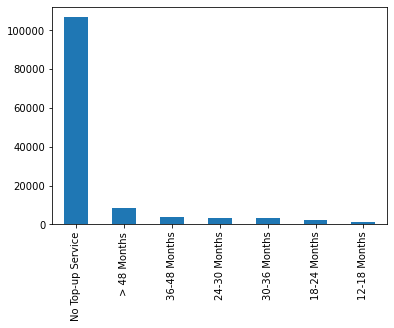

In [66]:
big_data['Top-up Month'].value_counts().plot(kind='bar')

In [182]:
data.nunique().sort_values(ascending=False)

ID                 128655
AssetID            128655
EMI                 24323
AmountFinance       20439
DisbursalAmount     19412
MonthlyIncome       11568
ZiPCODE              9123
LTV                  7988
AssetCost            7835
SupplierID           4539
DisbursalDate        2837
AuthDate             2711
MaturityDAte          980
City                  488
BranchID              189
Tenure                141
Area                   92
AGE                    73
State                  22
PaymentMode            11
ManufacturerID         10
Top-up Month            7
Frequency               4
SEX                     2
LoanStatus              2
InstlmentMode           2
dtype: int64

In [ ]:
Drop : AssetID    BranchID                      

In [179]:
big_data.nunique()<100

ID                 False
Frequency           True
InstlmentMode       True
LoanStatus          True
PaymentMode         True
BranchID           False
Area               False
Tenure             False
AssetCost          False
AmountFinance      False
DisbursalAmount    False
EMI                False
DisbursalDate      False
MaturityDAte       False
AuthDate           False
AssetID            False
ManufacturerID      True
SupplierID         False
LTV                False
SEX                 True
AGE                 True
MonthlyIncome      False
City               False
State               True
ZiPCODE            False
Top-up Month        True
dtype: bool

In [180]:
big_data['InstlmentMode'].nunique()

2

In [178]:
big_data.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               12199
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         2
SupplierID             0
LTV                    0
SEX                   64
AGE                   66
MonthlyIncome        248
City               11256
State                  0
ZiPCODE              373
Top-up Month       14745
dtype: int64

In [ ]:
data.n

In [17]:
demographic.columns

Index(['ID', 'SELF-INDICATOR', 'MATCH-TYPE', 'ACCT-TYPE', 'CONTRIBUTOR-TYPE',
       'DATE-REPORTED', 'OWNERSHIP-IND', 'ACCOUNT-STATUS', 'DISBURSED-DT',
       'CLOSE-DT', 'LAST-PAYMENT-DATE', 'CREDIT-LIMIT/SANC AMT',
       'DISBURSED-AMT/HIGH CREDIT', 'INSTALLMENT-AMT', 'CURRENT-BAL',
       'INSTALLMENT-FREQUENCY', 'OVERDUE-AMT', 'WRITE-OFF-AMT', 'ASSET_CLASS',
       'REPORTED DATE - HIST', 'DPD - HIST', 'CUR BAL - HIST',
       'AMT OVERDUE - HIST', 'AMT PAID - HIST', 'TENURE'],
      dtype='object')

In [85]:
#filling zip code with ranking as its categorical data , ranking is decided on basis of total disburst ammount of each zip code.

zip_ranking =big_data.groupby('ZiPCODE')['DisbursalAmount'].sum().reset_index()

zip_ranking['Ranking'] = zip_ranking['DisbursalAmount'].rank(ascending=False)

ranking_for_zipcode = zip_ranking.set_index('ZiPCODE').to_dict()['Ranking']

big_data['ZiPCODE'] = big_data['ZiPCODE'].map(ranking_for_zipcode)

In [86]:
big_data['ZiPCODE'].isnull().sum()

373

In [87]:
big_data.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')

In [ ]:
test

In [141]:
X = big_data[['ID','Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID',  'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'ZiPCODE', 'Top-up Month']]

In [142]:
X.dtypes

ID                          int64
Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
BranchID                    int64
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
DisbursalAmount           float64
EMI                       float64
DisbursalDate      datetime64[ns]
MaturityDAte       datetime64[ns]
AuthDate           datetime64[ns]
AssetID                     int64
ManufacturerID            float64
SupplierID                  int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
ZiPCODE                   float64
Top-up Month               object
dtype: object

In [143]:
X = pd.get_dummies(data=X,columns=['Frequency','InstlmentMode','LoanStatus','PaymentMode','SEX'])

In [144]:
X['DisbursalDate_day']=X['DisbursalDate'].dt.day
X['DisbursalDate_month']=X['DisbursalDate'].dt.month
X['DisbursalDate_year']=X['DisbursalDate'].dt.year


X['MaturityDAte_day']=X['MaturityDAte'].dt.day
X['MaturityDAte_month']=X['MaturityDAte'].dt.month
X['MaturityDAte_year']=X['MaturityDAte'].dt.year

X['AuthDate_day']=X['AuthDate'].dt.day
X['AuthDate_month']=X['AuthDate'].dt.month
X['AuthDate_year']=X['AuthDate'].dt.year

In [145]:
X.corr()

,ID,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,...,SEX_M,DisbursalDate_day,DisbursalDate_month,DisbursalDate_year,MaturityDAte_day,MaturityDAte_month,MaturityDAte_year,AuthDate_day,AuthDate_month,AuthDate_year
ID,1.000000,0.353583,-0.032629,0.073852,0.104945,0.104960,0.051572,0.470415,0.114337,0.322244,...,-0.028200,-0.008647,0.031171,0.495462,-0.117032,0.032888,0.469125,-0.005769,0.031390,0.495455
BranchID,0.353583,1.000000,0.061431,-0.033300,0.035586,0.035051,0.008395,0.117157,0.031282,0.143767,...,0.030750,-0.019603,0.022183,0.115527,-0.026641,0.062187,0.123843,-0.018452,0.022287,0.115509
Tenure,-0.032629,0.061431,1.000000,0.067276,0.374252,0.372538,0.031335,-0.081898,-0.006026,-0.052153,...,0.011905,0.004968,-0.008968,-0.072852,0.097404,0.040544,0.180186,0.003954,-0.008980,-0.072863
AssetCost,0.073852,-0.033300,0.067276,1.000000,0.587454,0.587266,0.278502,0.205824,-0.278867,0.047857,...,-0.035710,0.032003,0.002188,0.209127,-0.099505,0.000512,0.249662,0.031395,0.002336,0.209114
AmountFinance,0.104945,0.035586,0.374252,0.587454,1.000000,0.998736,0.361921,0.142781,-0.152647,0.012161,...,-0.036188,0.004677,0.012596,0.153106,-0.001709,0.027153,0.389830,0.004056,0.012667,0.153098
DisbursalAmount,0.104960,0.035051,0.372538,0.587266,0.998736,1.000000,0.365991,0.140447,-0.152386,0.010158,...,-0.036081,0.004051,0.012674,0.150908,-0.000594,0.027178,0.387013,0.003422,0.012745,0.150901
EMI,0.051572,0.008395,0.031335,0.278502,0.361921,0.365991,1.000000,0.041219,-0.065740,-0.044157,...,-0.008487,-0.044245,-0.018386,0.046335,0.035490,0.041885,0.039913,-0.046031,-0.018322,0.046336
AssetID,0.470415,0.117157,-0.081898,0.205824,0.142781,0.140447,0.041219,1.000000,-0.002500,0.484546,...,-0.103968,0.072680,0.026396,0.988174,-0.365417,0.017477,0.898128,0.071480,0.026778,0.988175
ManufacturerID,0.114337,0.031282,-0.006026,-0.278867,-0.152647,-0.152386,-0.065740,-0.002500,1.000000,0.087282,...,-0.002370,-0.019170,-0.004122,0.002228,0.021965,-0.021843,0.002056,-0.019064,-0.004029,0.002212
SupplierID,0.322244,0.143767,-0.052153,0.047857,0.012161,0.010158,-0.044157,0.484546,0.087282,1.000000,...,-0.042951,0.041044,0.011004,0.482295,-0.173523,0.004296,0.434571,0.040388,0.011099,0.482303


In [146]:
X.drop(['DisbursalDate','MaturityDAte','AuthDate'],1,inplace=True)

In [147]:
test = X[X['Top-up Month'].isnull()]

In [138]:
X['Top-up Month'].dropna(inplace=True)

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [139]:
X.dropna(inplace=True)

<ipython-input-139-32f8c2353909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [107]:
y=X['Top-up Month']
X.drop('Top-up Month',1,inplace=True)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=50)

In [176]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    
def results(y_test,X_test ):
    ypred=knn_clf.predict(X_test)
    result = confusion_matrix(y_test, ypred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, ypred)
    print("Classification Report:")
    print (result1)
    result2 = accuracy_score(y_test,ypred)
    print("Accuracy:",result2)

In [110]:
knn_clf=KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

NameError: name 'KNeighborsClassifier' is not defined

In [187]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[     0      0      0      0      0      0   8321]
 [     0      0      0      0      0      0   1034]
 [     0      0      0      0      0      0   2365]
 [     0      0      0      0      0      0   3490]
 [     0      0      0      0      0      0   3059]
 [     0      0      0      0      0      0   3645]
 [     0      0      0      0      0      0 106079]]


C:\Users\rushi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.00      0.00      0.00      8321
     12-18 Months       0.00      0.00      0.00      1034
     18-24 Months       0.00      0.00      0.00      2365
     24-30 Months       0.00      0.00      0.00      3490
     30-36 Months       0.00      0.00      0.00      3059
     36-48 Months       0.00      0.00      0.00      3645
No Top-up Service       0.83      1.00      0.91    106079

         accuracy                           0.83    127993
        macro avg       0.12      0.14      0.13    127993
     weighted avg       0.69      0.83      0.75    127993

Accuracy: 0.8287875118170525


In [7]:
sns.heatmap(data)

TypeError: '<=' not supported between instances of 'float' and 'str'

In [112]:
rus = RandomUnderSampler(random_state=0)

rus.fit(X,y)

X_resampled, y_resampled = rus.fit_sample(X, y)

In [118]:
X_test

No Top-up Service    1034
18-24 Months         1034
30-36 Months         1034
 > 48 Months         1034
24-30 Months         1034
12-18 Months         1034
36-48 Months         1034
Name: Top-up Month, dtype: int64

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,train_size=90,random_seed=0)

knn_clf=KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

TypeError: Invalid parameters passed: {'random_seed': 0}

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[628 136   0   0   6 138 112]
 [143 591  57  71  47  88  26]
 [ 84 556 168 106  28  59  24]
 [ 64 147 186 402 142  65  13]
 [ 76  48  71 166 337 314  14]
 [236  19   3  90 134 494  46]
 [333 250  48  59  82 157  84]]
Classification Report:
                   precision    recall  f1-score   support

      > 48 Months       0.40      0.62      0.49      1020
     12-18 Months       0.34      0.58      0.43      1023
     18-24 Months       0.32      0.16      0.22      1025
     24-30 Months       0.45      0.39      0.42      1019
     30-36 Months       0.43      0.33      0.37      1026
     36-48 Months       0.38      0.48      0.42      1022
No Top-up Service       0.26      0.08      0.13      1013

         accuracy                           0.38      7148
        macro avg       0.37      0.38      0.35      7148
     weighted avg       0.37      0.38      0.35      7148

Accuracy: 0.3782876329043089


In [148]:
test_results = knn_clf.predict(test.drop(['ID','Top-up Month'],1).dropna())

In [161]:
test.drop('Top-up Month',1,inplace=True)

C:\Users\rushi\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [163]:
test.dropna(inplace=True)

<ipython-input-163-2ad1235ea4d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


In [171]:
test['Top-up Month'] = test_results

ValueError: Length of values does not match length of index

In [172]:
test=test[['ID','Top-up Month']]

In [173]:
test.to_csv('test_result.csv')

In [ ]:
result(X)

In [183]:
X.columns

Index(['ID', 'BranchID', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'AssetID', 'ManufacturerID', 'SupplierID',
       'LTV', 'AGE', 'MonthlyIncome', 'ZiPCODE', 'Top-up Month',
       'Frequency_BI-Monthly', 'Frequency_Half Yearly', 'Frequency_Monthly',
       'Frequency_Quatrly', 'InstlmentMode_Advance', 'InstlmentMode_Arrear',
       'LoanStatus_Active', 'LoanStatus_Closed', 'PaymentMode_Auto Debit',
       'PaymentMode_Billed', 'PaymentMode_Direct Debit', 'PaymentMode_ECS',
       'PaymentMode_ECS Reject', 'PaymentMode_Escrow', 'PaymentMode_PDC',
       'PaymentMode_PDC Reject', 'PaymentMode_SI Reject', 'SEX_F', 'SEX_M',
       'DisbursalDate_day', 'DisbursalDate_month', 'DisbursalDate_year',
       'MaturityDAte_day', 'MaturityDAte_month', 'MaturityDAte_year',
       'AuthDate_day', 'AuthDate_month', 'AuthDate_year'],
      dtype='object')

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_resampled,y_resampled)
ypred=knn_clf.predict(X)